In [53]:
import pandas as pd
df = pd.read_csv("Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df["Extracurricular Activities"] = le.fit_transform(df["Extracurricular Activities"])

In [55]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


In [58]:
import numpy as np
val =df["Performance Index"].unique()
newval = np.sort(val)
print(newval)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90.]


In [49]:
import matplotlib.pyplot as plt

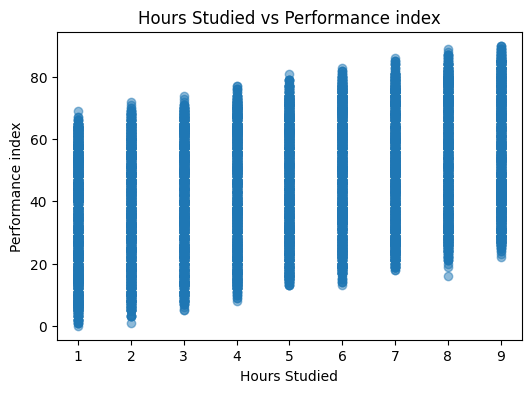

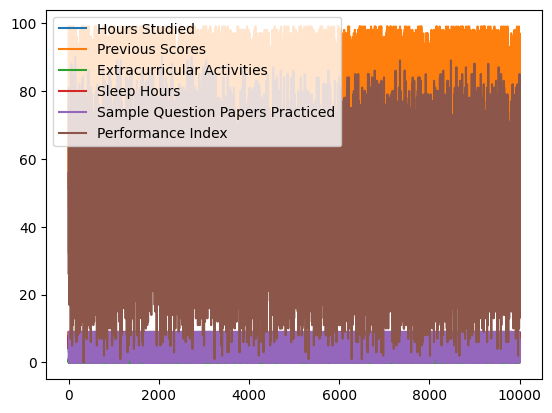

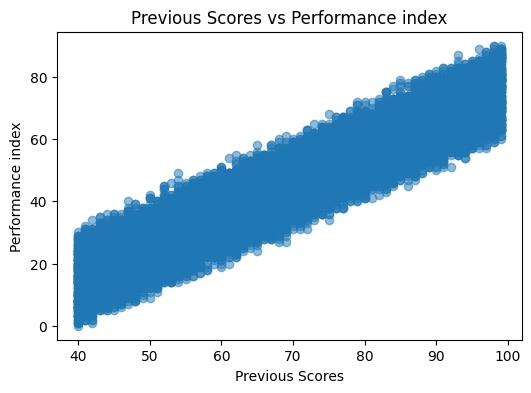

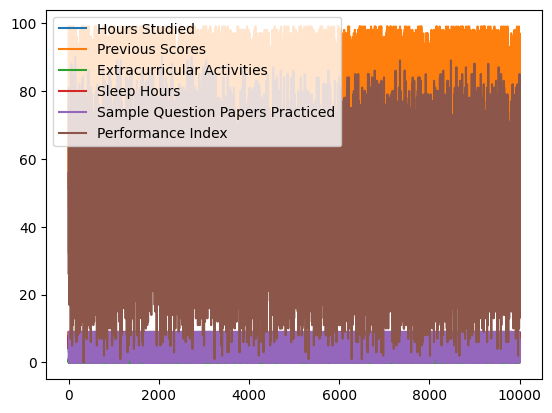

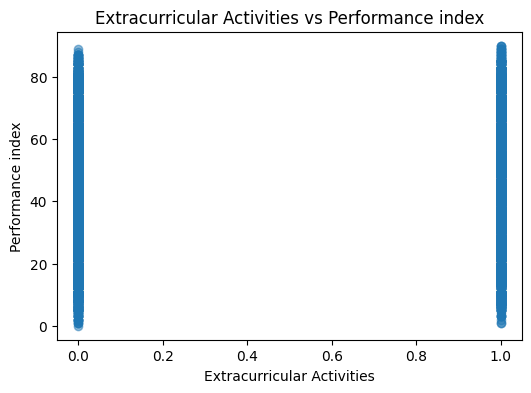

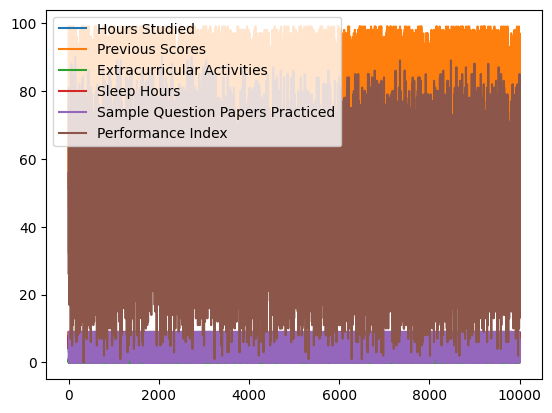

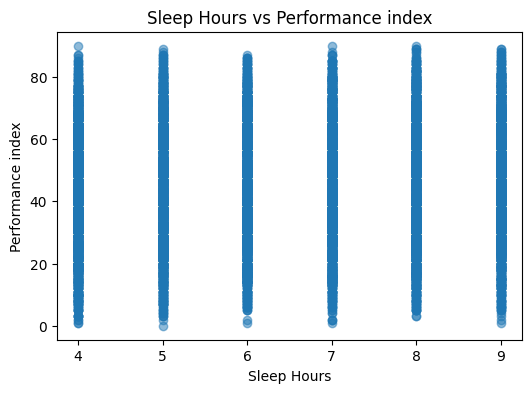

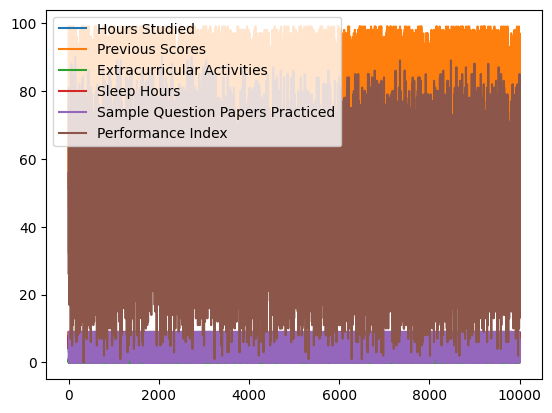

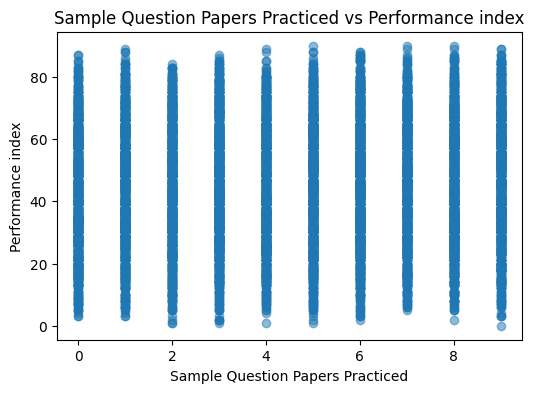

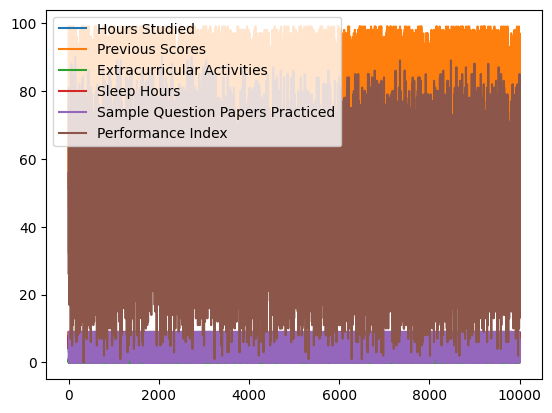

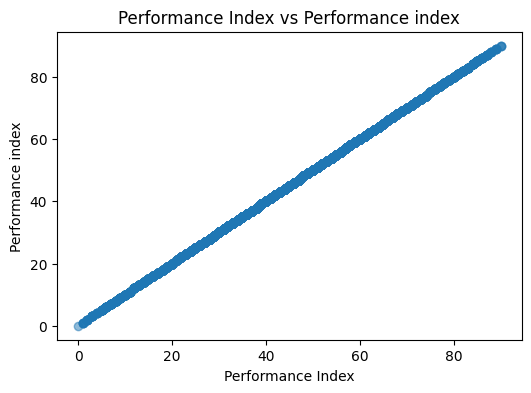

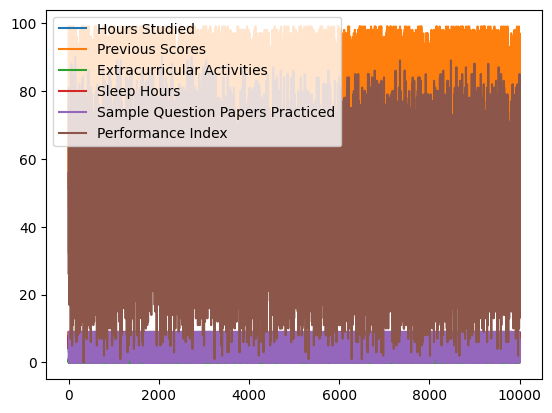

In [59]:
import matplotlib.pyplot as plt

# Assuming X_train contains your features and y_train is the target
for column in df.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(df[column], df["Performance Index"], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Performance index')
    plt.title(f'{column} vs Performance index')
    plt.show()
    df.plot()

In [61]:

X =df.iloc[:,0:5]
y =df.iloc[:,-1]
# print(X)

In [62]:
import numpy as np
X =np.array(X)
X

array([[ 7, 99,  1,  9,  1],
       [ 4, 82,  0,  4,  2],
       [ 8, 51,  1,  7,  2],
       ...,
       [ 6, 83,  1,  8,  5],
       [ 9, 97,  1,  7,  0],
       [ 7, 74,  0,  8,  1]], dtype=int64)

In [9]:
print(X.shape)

(10000, 5)


In [63]:
y = np.array(y)
print(len(X[0]))

5


In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=2)



In [126]:
w=np.ones(len(X[0]))
b =0
print(b)
print(w)

0
[1. 1. 1. 1. 1.]


In [127]:

l1=[1,2,3,4]
l2=[[2,2,2,2],[3,3,3,3],[1,1,1,1]]
l3 =np.array(l2)
print([x.mean() for x in l3])
store = [[w*x for w,x in zip(l1,r)]for r in l2]
preds =[sum(x)+1 for x in store]
# double comprehension one for loop through l2 and one for both common
# print(store)
# print(preds)

[2.0, 3.0, 1.0]


In [128]:
y_train=y_train.reshape(8000)

In [129]:
X_train[0][0]

9

In [140]:
def calculate_cost(ya,yp):
    
    b_error =[(ya[i]-yp[i]) for i in range(len(ya))]
    # print("b_error: ",b_error)
    b_sum =sum(b_error)
    cost = (1/(len(ya)))*b_sum

    return cost

print(calculate_cost([200],[100]))

100.0


In [145]:
w=np.ones(len(X[0]))
b =0
print(b)
print(w)

def predict(Xt,w,b):
    preds =[[w*x for w,x in zip(w,row)]for row in Xt]
    prediction =[sum(x)+b for x in preds]
    
    # print(prediction)
    # print(len(prediction))#800
    return prediction


def improve(X_train,ya,w,b):
    lr=0.0001
    for i in range(10000):

        yp =predict(X_train,w,b)
        cost = calculate_cost(ya=ya,yp=yp)

        b +=lr*cost        
        w =[w+lr*cost for w in w]
        print(cost) 
        
    return (cost,w,b)
    

def fit_model(X_train,y_train,w,b):
    
    prediction = predict(X_train,w,b)
    cost  = calculate_cost(y_train,prediction)
    # print(cost)
     
    m=[x.mean() for x in X_train]
    cost,w,b = improve(X_train,y_train,w,b)
    print("training",cost)
    prediction =predict(X_train,w,b)

    # cost  = calculate_cost(y_train,prediction)
    # # print(prediction)
    # # print(cost,w,b)
    return prediction,w,b,cost



# fit_model(X_train,y_train,w,b)
prediction,w,b,cost = fit_model(X_train,y_train,w,b)
print("printing w",w)

print("printing b",b)


# print("printing imp training cost",cost)
# print(y_train)

    


0
[1. 1. 1. 1. 1.]
-40.82325
-40.46834082914979
-40.116517167649725
-39.767752190697266
-39.42201930670208
-39.079292155253384
-38.73954460511403
-38.40275075222604
-38.0688849177364
-37.737921646038764
-37.4098357028322
-37.08460207319894
-36.762195959694836
-36.442592780460636
-36.12576816734572
-35.81169796405262
-35.50035822429222
-35.19172520996254
-34.88577538933201
-34.58248543525215
-34.28183222337201
-33.98379283039173
-33.68834453228274
-33.39546480258825
-33.1051313106872
-32.817321920097825
-32.5320146867893
-32.24918785750551
-31.968819868109115
-31.69088934194044
-31.415375088179665
-31.14225610023786
-30.87151155415366
-30.603120807004306
-30.337063395332358
-30.0733190335859
-29.811867612571792
-29.552689197921307
-29.29576402857272
-29.041072515260744
-28.78859523902792
-28.538312949738714
-28.290206564616042
-28.04425716678523
-27.80044600382824
-27.558754486360353
-27.31916418660673
-27.081656837001276
-26.846214328791593
-26.61281871066002
-26.3814521873532
-26.1520

initial cost:
54380440000.0


    


In [122]:
m = len(y_train)
error = [((p-a)) for p , a  in zip(prediction,y_train)]
error
# error = sum(error)/m
# print(sum(error))

[-16.713278428305188,
 -8.95673928546777,
 -1.4001501069727667,
 8.782445535899164,
 -15.061115392578571,
 12.130282500172548,
 21.765091214428683,
 14.478119464445939,
 -6.974093606938254,
 -8.382795785502282,
 23.173793392992714,
 -18.87851974970664,
 8.08677160735239,
 9.25201292875385,
 1.5736933216775455,
 8.00855207159126,
 -8.139334928339707,
 16.765091214428683,
 -12.835008856886475,
 7.252012928753842,
 -5.321930571211638,
 -1.1393349283397072,
 -16.121980606869222,
 4.617204214497711,
 10.904175964480451,
 10.843310750189815,
 -12.000250178287928,
 14.82595642871933,
 -4.321930571211645,
 -0.487171892613091,
 -0.32193057121163804,
 1.0867716073523965,
 -2.4436609997929253,
 -5.182845821159873,
 -12.95673928546777,
 8.556339000207068,
 7.373743357335137,
 -16.304576249741153,
 -12.774143642595838,
 -6.608902321194378,
 4.9215302859509364,
 9.965041178771102,
 14.00855207159126,
 -19.469817571142606,
 8.782445535899171,
 0.9476868573006172,
 -13.713278428305188,
 -2.01760449975

In [123]:
print(prediction[:20])
print(y_train[:20])

[56.28672157169481, 52.04326071453223, 35.59984989302723, 38.782445535899164, 58.93888460742143, 36.13028250017255, 29.765091214428683, 33.47811946444594, 43.025906393061746, 44.61720421449772, 28.173793392992714, 62.12148025029336, 44.08677160735239, 38.25201292875385, 52.573693321677545, 34.00855207159126, 48.86066507166029, 29.765091214428683, 54.164991143113525, 38.25201292875384]
[73. 61. 37. 30. 74. 24.  8. 19. 50. 53.  5. 81. 36. 29. 51. 26. 57. 13.
 67. 31.]


In [124]:
y = list(y_train)
print(type(y))
y = y[:20]
prediction=prediction[:20]

<class 'list'>


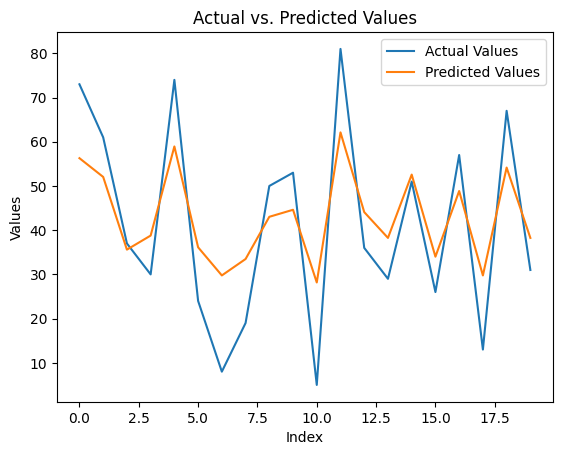

In [125]:
import matplotlib.pyplot as plt

# Assuming prediction is the predicted values for y_train
plt.plot(y, label='Actual Values')  # Reset index to match the prediction if necessary
plt.plot(prediction, label='Predicted Values')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Actual vs. Predicted Values')
plt.legend()  # Add legend to differentiate between the lines
plt.show()


In [51]:
import matplotlib.pyplot as plt

# Assuming X_train contains your features and y_train is the target
for column in X_train.columns:
    plt.figure(figsize=(6, 4))
    plt.scatter(X_train[column], y_train, alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Performance index')
    plt.title(f'{column} vs Performance index')
    plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'